In [3]:
!pip install WordCloud

  Using cached wordcloud-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv
import re
import numpy as np
import seaborn as sns

In [5]:
df_all = pd.read_csv("NewsAPI_Labeled_Unclean.csv", index_col = 0)
df_all

,Label,Author,Title,Headline,Content
0,Brazil,Science X,Sustainable agricultural systems reduce greenh...,A study conducted at the University of S o Pau...,A study conducted at the University of S o Pau...
1,Brazil,Science X,Brazil urges EU to suspend punitive anti defor...,Brazil said Thursday it has urged the EU to su...,Brazil said Thursday it has urged the EU to su...
2,Brazil,Kim Chipman and Gerson Freitas Jr,US Says Bioceres Genetically Modified Wheat Sa...,Bloomberg The Biden administration says Biocer...,Bloomberg The Biden administration says Biocer...
3,Brazil,Andrea Wenzel,NASA image reveals the colorful palette of Bra...,This Dec image of the S o Francisco River in s...,This Dec image of the S o Francisco River in s...
4,Brazil,Science X,The top methane emitting nations lack policies...,While the United States and China have taken i...,While the United States and China have taken i...
...,...,...,...,...,...
387,Chile,Ver nica M Merino Ren Aguilar Luis F Pi a Migu...,Regrowth dynamics and morpho physiological cha...,Traditional pastures in temperate regions face...,Abstract Traditional pastures in temperate reg...
388,Chile,Tomoko Otake,Can Japan handle a heat wave and natural disas...,Recent typhoons and the Nankai Trough megaquak...,Futtsu Chiba Pref Hiroaki Nishino witnessed th...
389,Chile,Sam Tabachnik,Colorado sheepherders have been exploited for ...,One worker told The Post that he and his fello...,ROUTT NATIONAL FOREST Ignacio Alvarado can sti...
390,Chile,Shang Jin Wei,Would Harris or Trump Be Better for the World ...,A major uncertainty looming over the global ec...,A major uncertainty looming over the global ec...


In [7]:
df_all["Label"].unique()

array(['Brazil', 'Columbia', 'Argentina', 'Chile'], dtype=object)

In [4]:
df_all['Author'] = df_all['Author'].str.slice(0,50)
df_all

,Label,Author,Title,Headline,Content
0,Brazil,Science X,Sustainable agricultural systems reduce greenh...,A study conducted at the University of S o Pau...,A study conducted at the University of S o Pau...
1,Brazil,Science X,Brazil urges EU to suspend punitive anti defor...,Brazil said Thursday it has urged the EU to su...,Brazil said Thursday it has urged the EU to su...
2,Brazil,Kim Chipman and Gerson Freitas Jr,US Says Bioceres Genetically Modified Wheat Sa...,Bloomberg The Biden administration says Biocer...,Bloomberg The Biden administration says Biocer...
3,Brazil,Andrea Wenzel,NASA image reveals the colorful palette of Bra...,This Dec image of the S o Francisco River in s...,This Dec image of the S o Francisco River in s...
4,Brazil,Science X,The top methane emitting nations lack policies...,While the United States and China have taken i...,While the United States and China have taken i...
...,...,...,...,...,...
387,Chile,Ver nica M Merino Ren Aguilar Luis F Pi a Migu...,Regrowth dynamics and morpho physiological cha...,Traditional pastures in temperate regions face...,Abstract Traditional pastures in temperate reg...
388,Chile,Tomoko Otake,Can Japan handle a heat wave and natural disas...,Recent typhoons and the Nankai Trough megaquak...,Futtsu Chiba Pref Hiroaki Nishino witnessed th...
389,Chile,Sam Tabachnik,Colorado sheepherders have been exploited for ...,One worker told The Post that he and his fello...,ROUTT NATIONAL FOREST Ignacio Alvarado can sti...
390,Chile,Shang Jin Wei,Would Harris or Trump Be Better for the World ...,A major uncertainty looming over the global ec...,A major uncertainty looming over the global ec...


In [8]:
df_brazil = df_all.where(df_all.Label == "Brazil").dropna()
df_colombia = df_all.where(df_all.Label == "Columbia").dropna()
df_argentina = df_all.where(df_all.Label == "Argentina").dropna()
df_chile = df_all.where(df_all.Label == "Chile").dropna()

print(len(df_brazil), len(df_colombia), len(df_argentina), len(df_chile))

93 87 97 80


In [9]:


category_names = df_all.Author.unique().tolist()
print(category_names)



['Science X', 'Kim Chipman and Gerson Freitas Jr', 'Andrea Wenzel', 'Umberto BACCHI with Michelle FITZPATRICK in Frankfurt', 'Monika Luabeya', 'Pep Canadell Marielle Saunois Rob Jackson', 'Mahmoud Itani', 'Grain', 'Yolanda Ariadne Collins', 'Rachel Ehrenberg Knowable Magazine', 'Christine McDaniel Contributor Christine McDaniel Contributor https www forbes com sites christinemcdaniel', 'AFP News', 'Angelica Mari Senior Contributor Angelica Mari Senior Contributor https www forbes com sites angelicamarideoliveira', 'John Lovett', 'Jampa Uchoa', 'Gabriela Pomeroy BBC News', 'Michael DANTAS with Juan Sebastian SERRANO in Rio de Janeiro', 'David Blackmon Senior Contributor David Blackmon Senior Contributor https www forbes com sites davidblackmon', 'Mike Florio', 'Juan Sebastian SERRANO', 'theweekonlineeditorsuk futurenet com Harriet Marsden The Week UK', 'Hakai Magazine', 'Tom Polansek and Julie Ingwersen', 'Reuters', 'webdesk voanews com Reuters', 'Ian Verrender', 'Cecilia Rodriguez Seni

In [10]:
author_vc_all = pd.DataFrame(df_all.Author.value_counts().rename_axis('Author').reset_index(name='counts'))

In [11]:
author_vc_all

,Author,counts
0,Research and Markets,14
1,Reuters,14
2,SPHERICAL INSIGHTS LLP,11
3,SNS Insider pvt ltd,9
4,GlobeNewswire,8
...,...,...
219,Steve Hanley,1
220,Travis Gettys,1
221,Jonathan Raymond,1
222,Jack Marley Environment Energy Editor UK edition,1


In [12]:
brazil_ac = pd.DataFrame(df_brazil.Author.value_counts().rename_axis('Author').reset_index(name='Brazil'))
brazil_ac

,Author,Brazil
0,Science X,4
1,SNS Insider pvt ltd,4
2,Reuters,3
3,Research and Markets,3
4,Yolanda Ariadne Collins Lecturer International...,2
...,...,...
70,Shola Lawal,1
71,Manulife Contributor Brand Contributor Manulif...,1
72,Antony Sguazzin,1
73,Kim Chipman and Gerson Freitas Jr,1


In [13]:
colombia_ac = pd.DataFrame(df_colombia.Author.value_counts().rename_axis('Author').reset_index(name='Colombia'))

colombia_ac

,Author,Colombia
0,GlobeNewswire,6
1,John Pike,5
2,Reuters,4
3,Bloomberg News,3
4,MarketBeat News,2
...,...,...
63,Literary Hub,1
64,The Niche Research,1
65,Minal Zaheer,1
66,Joe Cornell Contributor Joe Cornell Contributo...,1


In [14]:
argentina_ac = pd.DataFrame(df_argentina.Author.value_counts().rename_axis('Author').reset_index(name='Argentina'))
argentina_ac

,Author,Argentina
0,Research and Markets,11
1,SPHERICAL INSIGHTS LLP,9
2,Reuters,6
3,SNS Insider pvt ltd,5
4,Arianna Johnson Forbes Staff Arianna Johnson F...,3
...,...,...
59,ERIC TUCKER REGINA GARCIA CANO and JOSHUA GOOD...,1
60,Decanter Staff,1
61,theweekonlineeditorsuk futurenet com Harriet M...,1
62,Science X,1


In [15]:
chile_ac = pd.DataFrame(df_chile.Author.value_counts().rename_axis('Author').reset_index(name='Chile'))
chile_ac

,Author,Chile
0,Investing com,5
1,Catherine Osborn,2
2,MarketBeat News,2
3,Kris Cooper,2
4,Bloomberg News,2
...,...,...
64,Reuters,1
65,Mowi ASA,1
66,list metadata agency,1
67,Tim Treadgold Contributor Tim Treadgold Contri...,1


In [17]:
result = pd.concat([brazil_ac, colombia_ac, argentina_ac, chile_ac], axis=0)
result

,Author,Brazil,Colombia,Argentina,Chile
0,Science X,4.0,NaN,NaN,NaN
1,SNS Insider pvt ltd,4.0,NaN,NaN,NaN
2,Reuters,3.0,NaN,NaN,NaN
3,Research and Markets,3.0,NaN,NaN,NaN
4,Yolanda Ariadne Collins Lecturer International...,2.0,NaN,NaN,NaN
...,...,...,...,...,...
64,Reuters,NaN,NaN,NaN,1.0
65,Mowi ASA,NaN,NaN,NaN,1.0
66,list metadata agency,NaN,NaN,NaN,1.0
67,Tim Treadgold Contributor Tim Treadgold Contri...,NaN,NaN,NaN,1.0


In [18]:
result = result.fillna(0)
result

,Author,Brazil,Colombia,Argentina,Chile
0,Science X,4.0,0.0,0.0,0.0
1,SNS Insider pvt ltd,4.0,0.0,0.0,0.0
2,Reuters,3.0,0.0,0.0,0.0
3,Research and Markets,3.0,0.0,0.0,0.0
4,Yolanda Ariadne Collins Lecturer International...,2.0,0.0,0.0,0.0
...,...,...,...,...,...
64,Reuters,0.0,0.0,0.0,1.0
65,Mowi ASA,0.0,0.0,0.0,1.0
66,list metadata agency,0.0,0.0,0.0,1.0
67,Tim Treadgold Contributor Tim Treadgold Contri...,0.0,0.0,0.0,1.0


In [75]:
#define how to aggregate various fields
agg_functions = {'Author': 'first', 'Brazil': "sum", "Colombia": "sum", "Argentina": "sum", "Chile": "sum"}

#create new DataFrame by combining rows with same id values
df_new = pd.DataFrame(result.groupby(result['Author']).aggregate(agg_functions))
df_new['Author'] = df_new['Author'].str.slice(0,50)
df_new = df_new.set_index("Author")



In [76]:
df_new["sum"] = df_new.sum(axis=1)
df_new

,Brazil,Colombia,Argentina,Chile,sum
Author,,,,,
A Di Paola L Prinsloo A Hunter,0.0,0.0,0.0,1.0,1.0
AFP,1.0,0.0,0.0,0.0,1.0
AFP News,1.0,0.0,0.0,0.0,1.0
AJ Vinayak,2.0,0.0,0.0,0.0,2.0
Abdulrahman Zakariyau,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
list metadata agency,0.0,0.0,1.0,1.0,2.0
theweekonlineeditorsuk futurenet com Harriet Marsd,1.0,0.0,1.0,0.0,2.0
webdesk voanews com Reuters,1.0,0.0,0.0,1.0,2.0


In [77]:
df_new = df_new.sort_values('sum')
df_new = df_new.drop(columns = 'sum', axis =1)
df_new

,Brazil,Colombia,Argentina,Chile
Author,,,,
A Di Paola L Prinsloo A Hunter,0.0,0.0,0.0,1.0
Michael DANTAS with Juan Sebastian SERRANO in Rio,1.0,0.0,0.0,0.0
Michael Snyder,0.0,0.0,0.0,1.0
Mike Florio,1.0,0.0,0.0,0.0
Mike Schuler,0.0,1.0,0.0,0.0
...,...,...,...,...
GlobeNewswire,0.0,6.0,0.0,2.0
SNS Insider pvt ltd,4.0,0.0,5.0,0.0
SPHERICAL INSIGHTS LLP,2.0,0.0,9.0,0.0


In [36]:
print(len(result["Author"].unique()))
print(result["Brazil"].sum())
print(result["Colombia"].sum())
print(result["Argentina"].sum())
print(result["Chile"].sum())


224
93.0
87.0
97.0
80.0


In [39]:
print(len(df_new["Author"].unique()))
print(df_new["Brazil"].sum())
print(df_new["Colombia"].sum())
print(df_new["Argentina"].sum())
print(df_new["Chile"].sum())

224
93.0
87.0
97.0
80.0


<AxesSubplot: ylabel='Author'>

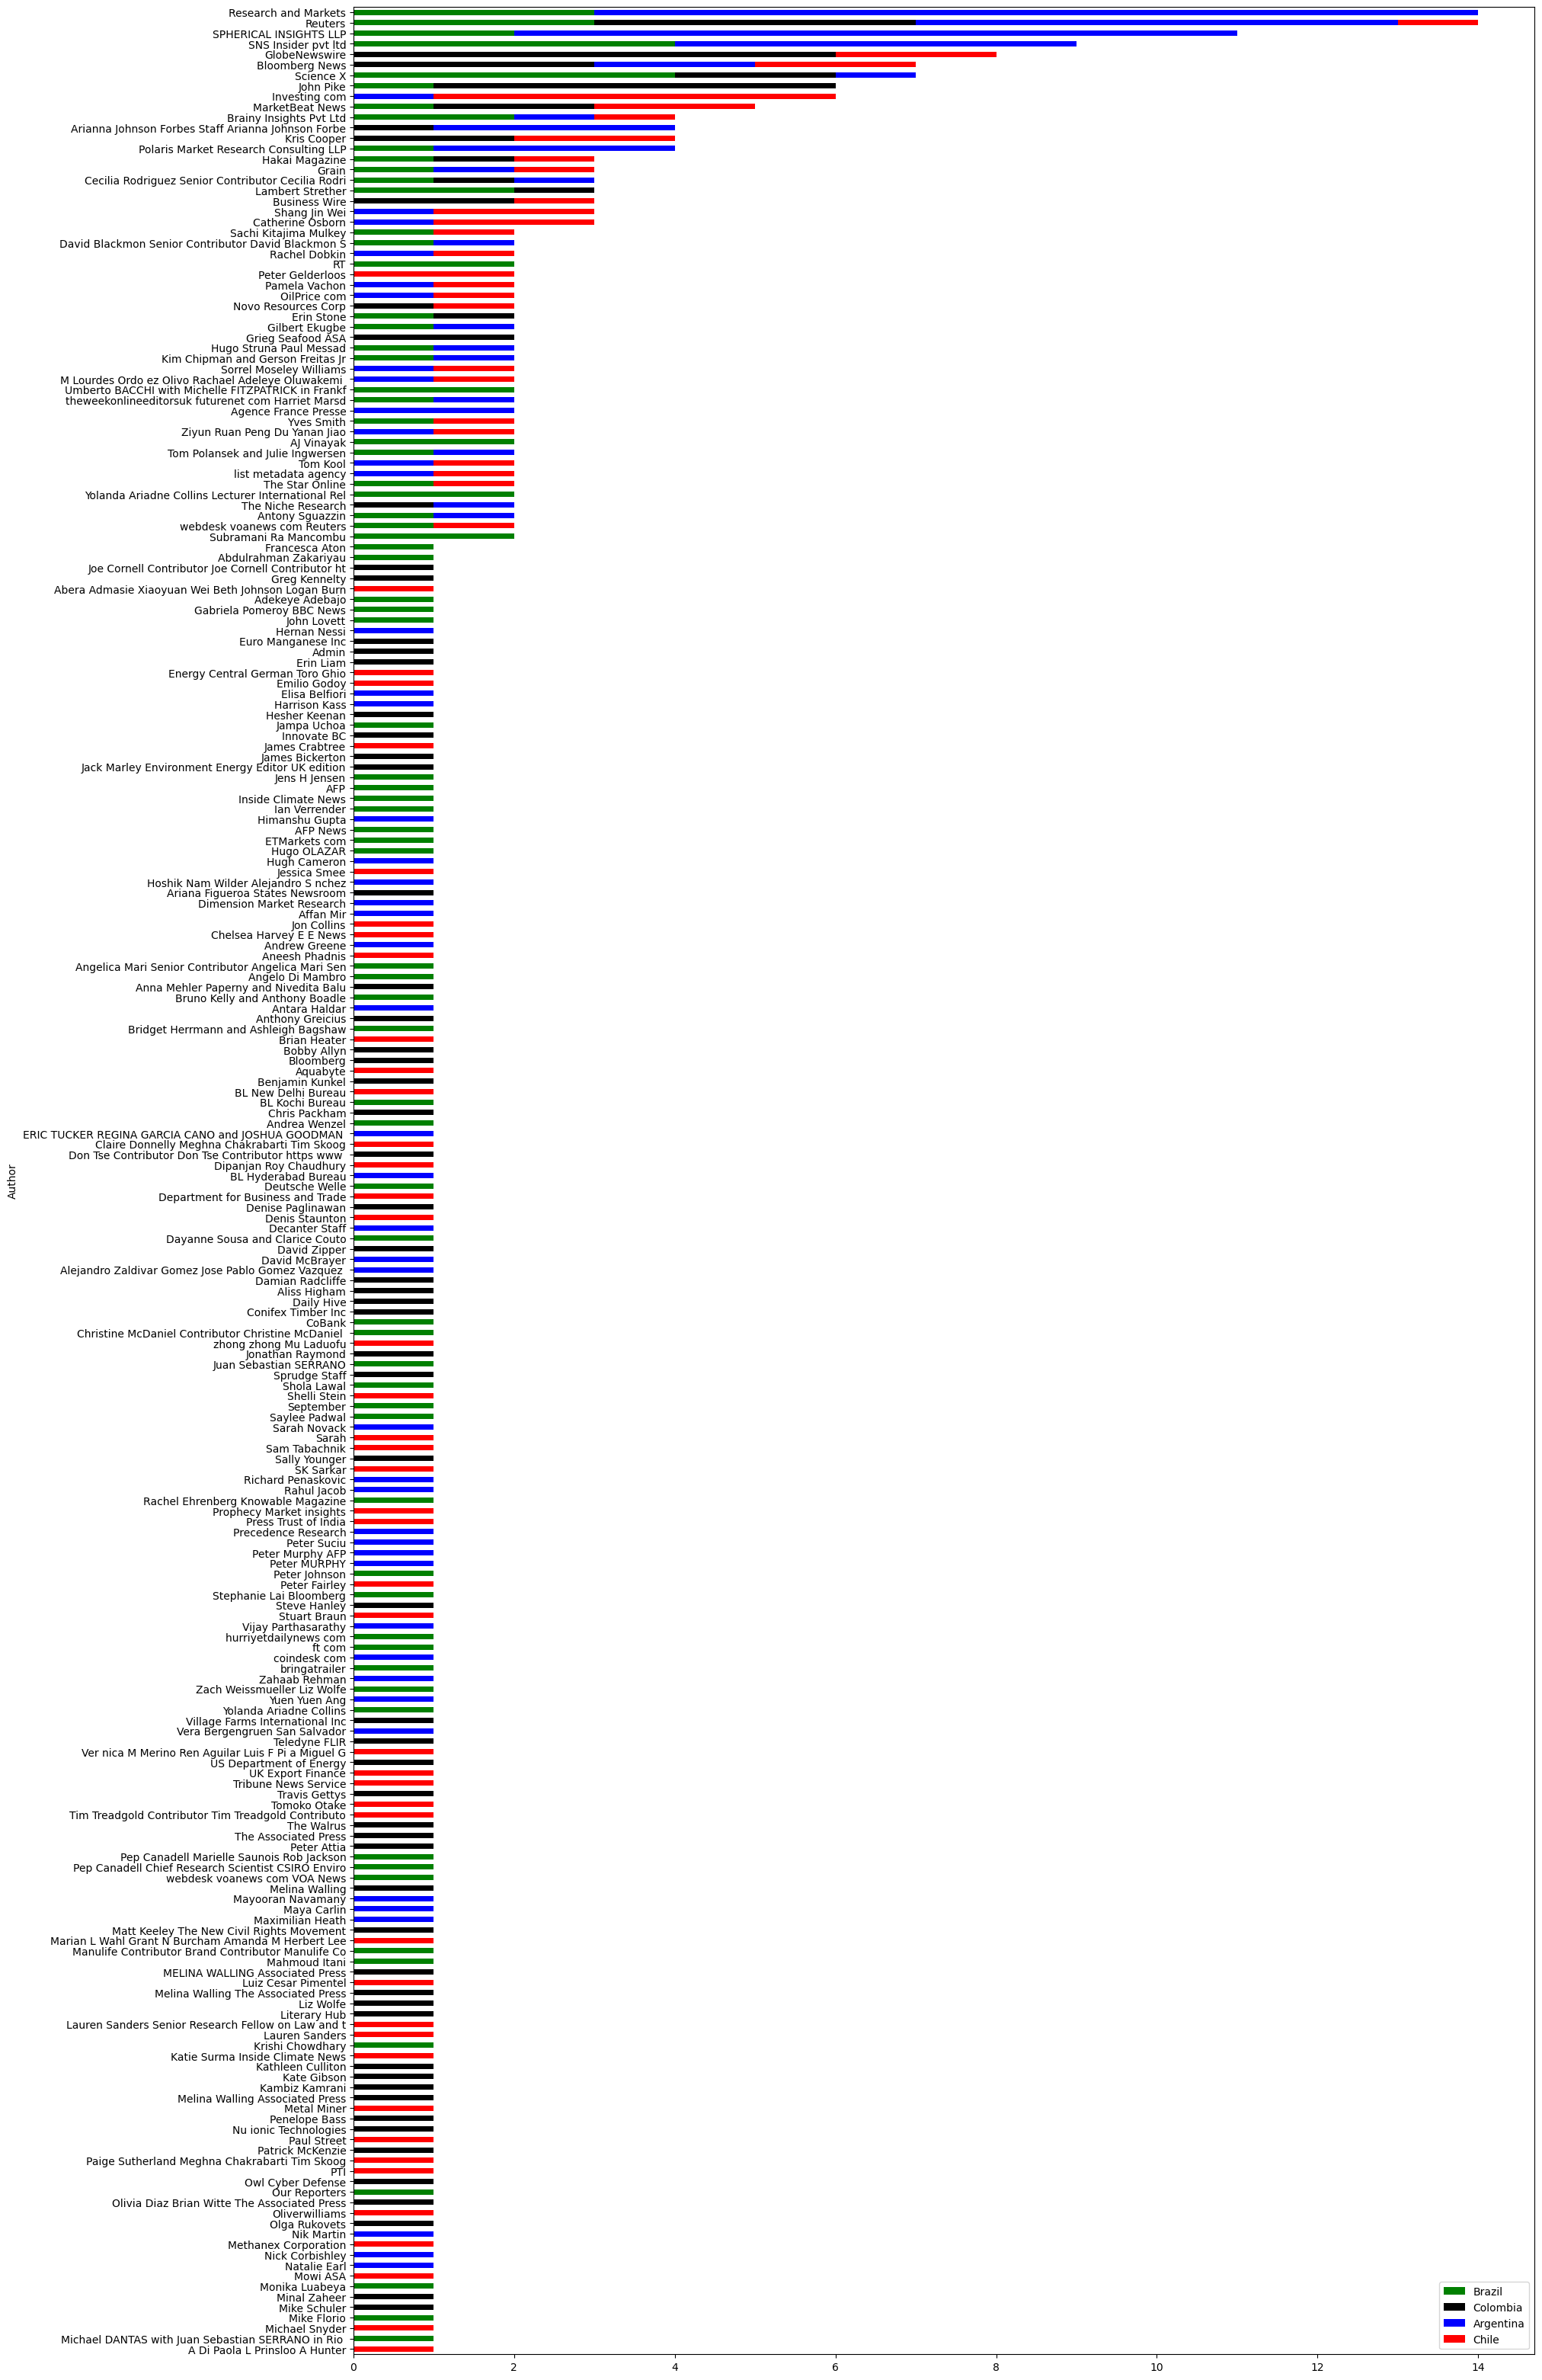

In [78]:

df_new.plot(kind='barh', stacked=True, color=["green", "black", "blue", "red"], figsize=(20,40))


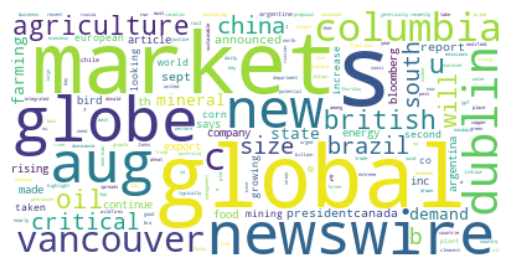

In [17]:
text = df_all['Headline'].to_string(index=False).lower()
text = text.replace('\n', " ")
#text
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()